In [36]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [37]:
# Importation du dataset
df_loto = pd.read_csv("C:/Users/axela/Desktop/Dév Python/loto_gagnant_prediction/data/num_gagnant_loto_11-2019_04-2025.csv", delimiter=";")

In [38]:
# Affichage des premières lignes du dataset
df_loto.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance,...,rapport_du_rang1_second_tirage,nombre_de_gagnant_au_rang_2_second_tirage,rapport_du_rang2_second_tirage,nombre_de_gagnant_au_rang_3_second_tirage,rapport_du_rang3_second_tirage,nombre_de_gagnant_au_rang_4_second_tirage,rapport_du_rang4_second_tirage,numero_jokerplus,devise,Unnamed: 49
0,25043,MERCREDI,09/04/2025,08/07/2025,36,16,12,47,46,9,...,"31582,00",524,"184,80",17309,"14,30",192928,"3,00",4628122,eur,NaN
1,25042,LUNDI,07/04/2025,06/07/2025,21,34,13,38,2,1,...,"53242,00",183,"637,40",8171,"36,70",120985,"3,00",8902258,eur,NaN
2,25041,SAMEDI,05/04/2025,04/07/2025,14,30,22,8,27,7,...,"42759,00",319,"584,30",13824,"34,60",195473,"3,00",7196936,eur,NaN
3,25040,MERCREDI,02/04/2025,01/07/2025,45,5,34,15,4,9,...,"146433,00",264,"551,50",12367,"30,20",183987,"3,00",5807884,eur,NaN
4,25039,LUNDI,31/03/2025,29/06/2025,3,4,28,16,38,4,...,"124431,00",214,"607,50",10160,"32,90",148875,"3,00",1886728,eur,NaN


In [39]:
# Affichage des types du dataset
print(df_loto.dtypes)

annee_numero_de_tirage                                    int64
jour_de_tirage                                           object
date_de_tirage                                           object
date_de_forclusion                                       object
boule_1                                                   int64
boule_2                                                   int64
boule_3                                                   int64
boule_4                                                   int64
boule_5                                                   int64
numero_chance                                             int64
combinaison_gagnante_en_ordre_croissant                  object
nombre_de_gagnant_au_rang1                                int64
rapport_du_rang1                                         object
nombre_de_gagnant_au_rang2                                int64
rapport_du_rang2                                         object
nombre_de_gagnant_au_rang3              

In [40]:
# Conversion des colonnes numériques (boules, gagnants, rapports, etc.)
colonnes_a_convertir = [
    "boule_1",
    "boule_2",
    "boule_3",
    "boule_4",
    "boule_5",
    "numero_chance",
    "nombre_de_gagnant_au_rang1",
    "rapport_du_rang1",
    "nombre_de_gagnant_au_rang2",
    "rapport_du_rang2",
    "nombre_de_gagnant_au_rang3",
    "rapport_du_rang3",
    "nombre_de_gagnant_au_rang4",
    "rapport_du_rang4",
    "nombre_de_gagnant_au_rang5",
    "rapport_du_rang5",
    "nombre_de_gagnant_au_rang6",
    "rapport_du_rang6",
    "nombre_de_gagnant_au_rang7",
    "rapport_du_rang7",
    "nombre_de_gagnant_au_rang8",
    "rapport_du_rang8",
    "nombre_de_gagnant_au_rang9",
    "rapport_du_rang9",
]

In [41]:
# Conversion des colonnes en float
for col in colonnes_a_convertir:
    df_loto[col] = pd.to_numeric(df_loto[col], errors='coerce')

In [ ]:
# Suppression des lignes avec valeurs manquantes
df_clean = df_loto.dropna(subset=["nombre_de_gagnant_au_rang1", "rapport_du_rang1"])

In [43]:
# Calcul de la matrice de corrélation
correlation_matrix = df_clean[colonnes_a_convertir].corr()

c:\Users\axela\anaconda3\envs\work-env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


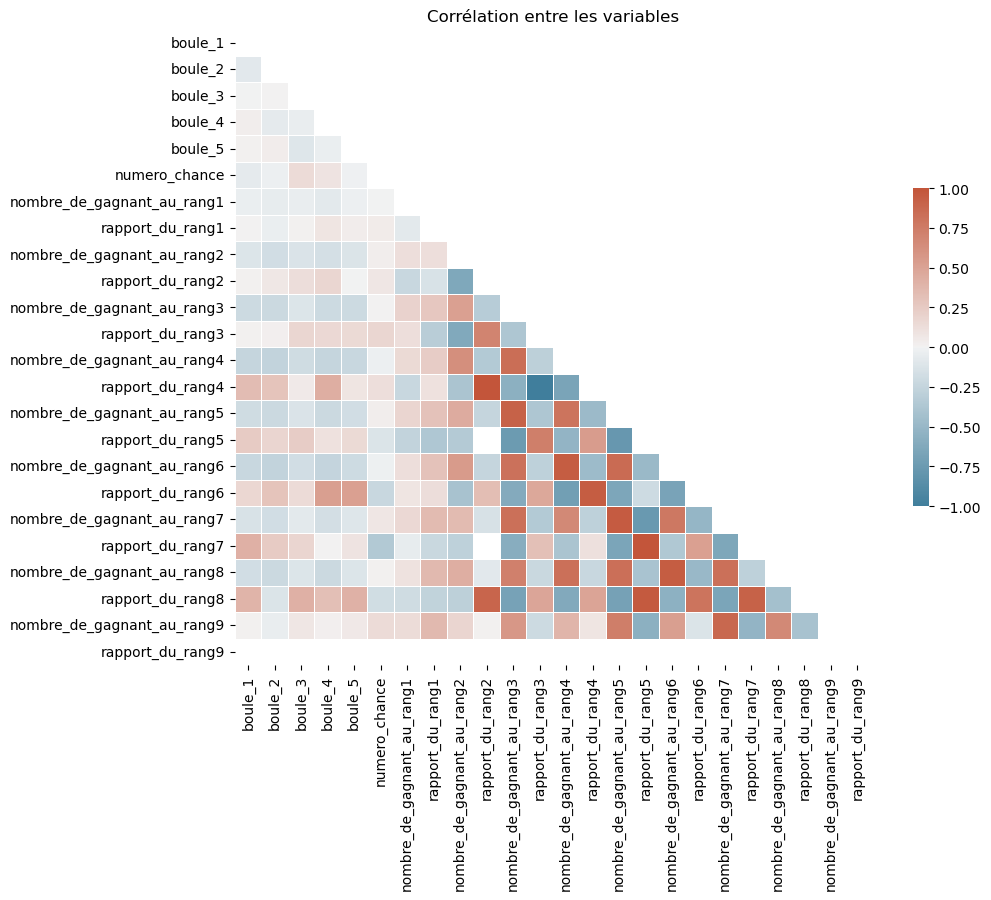

In [44]:
# Affichage avec seaborn
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sbn.diverging_palette(230, 20, as_cmap=True)

sbn.heatmap(correlation_matrix, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)
plt.title('Corrélation entre les variables')
plt.tight_layout()
plt.show()